In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib
warnings.filterwarnings('ignore')

## Reading Dataset

In [2]:
df = pd.read_csv("Dataset_A_loan.csv")
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [3]:
df.shape

(45000, 14)

## EDA and Pre-processing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   42750 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

Hal yang bisa diidentifikasi dari informasi dataset di atas:
- Target variable berupa class (0,1) 0 berarti loan ditolak, 1 berarti loan diterima
- Missing value pada fitur "person_income" sebanyak 2250 (5% dari data) yang harus kita atasi
- Data type person_age diubah menjadi integer saja agar hasil berupa bilangan bulat

In [5]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.275000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.018223e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,7.331158e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.726725e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.705500e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.582125e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,5.556399e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


Di beberapa fitur numerikal ini kita bisa identifikasi adanya outliers dari nilai max yang jauh dari nilai Q3 dari tiap fitur.  
Kita akan melihat distribusi nilai dari fitur numerik dengan boxplot dan histogram.  


#### Pengubahan data type "person_age"

In [6]:
df["person_age"] = df["person_age"].astype(dtype="int64")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  int64  
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   42750 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

#### Pemisahan variabel x dan y serta kolom numerik dan kategorik

In [8]:
x = df.drop('loan_status', axis =1)
y = df['loan_status']

In [9]:
numerical = []
categorical = []

for i in x.columns:
    if x[i].dtype == 'object':
        categorical.append(i)
    elif "int" in str(x[i].dtype) or "float" in str(x[i].dtype):
        numerical.append(i)

### Distribusi variabel target

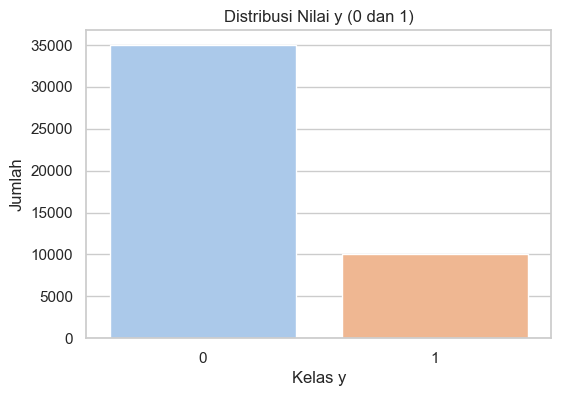

In [10]:
value_counts = df['loan_status'].value_counts().sort_index()

# Buat bar chart
sns.set(style="whitegrid")
plt.figure(figsize=(6,4))
sns.barplot(x=value_counts.index, y=value_counts.values, palette="pastel")

# Tambahkan label
plt.xlabel("Kelas y")
plt.ylabel("Jumlah")
plt.title("Distribusi Nilai y (0 dan 1)")
plt.xticks([0, 1])
plt.show()


### Distribusi kolom kategori

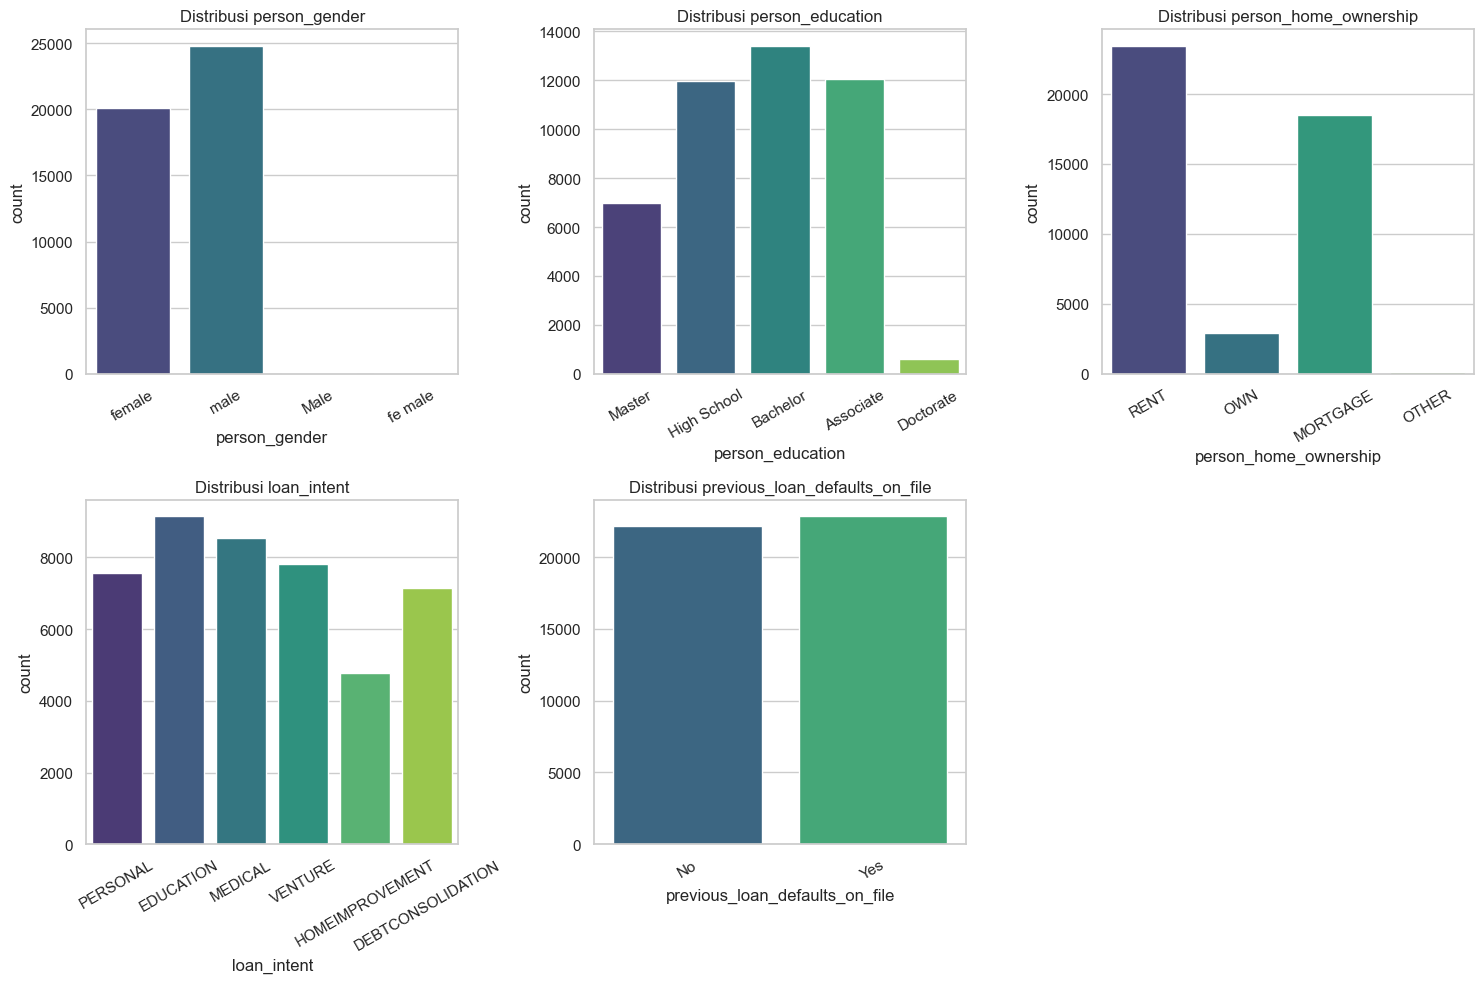

In [11]:
# Ukuran plot
num_cols = len(categorical)
rows = (num_cols + 2) // 3  # 3 kolom per baris
plt.figure(figsize=(15, 5 * rows))

# Loop semua kolom kategorikal
for i, col in enumerate(categorical):
    plt.subplot(rows, 3, i + 1)
    sns.countplot(data=x, x=col, palette="viridis")
    plt.title(f'Distribusi {col}')
    plt.xticks(rotation=30)
    plt.tight_layout()

plt.show()


Permasalahan yang dapat dilihat dari fitur kategori terdapat pada fitur "person_gender" yang terdapat ketidakseragaman dalam menginput data "Male" dan "Female", maka saya akan mengatasi hal ini.

### Memperbaiki masalah nilai dalam fitur "person_gender"

In [12]:
x["person_gender"].value_counts()

person_gender
male       24799
female     20111
Male          45
fe male       45
Name: count, dtype: int64

In [13]:
gender_fixed = {"female": "Female", "male": "Male", "fe male": "Female"}

x["person_gender"] = df["person_gender"].replace(gender_fixed)

In [14]:
x["person_gender"].value_counts()

person_gender
Male      24844
Female    20156
Name: count, dtype: int64

### Distribusi kolom numerik 

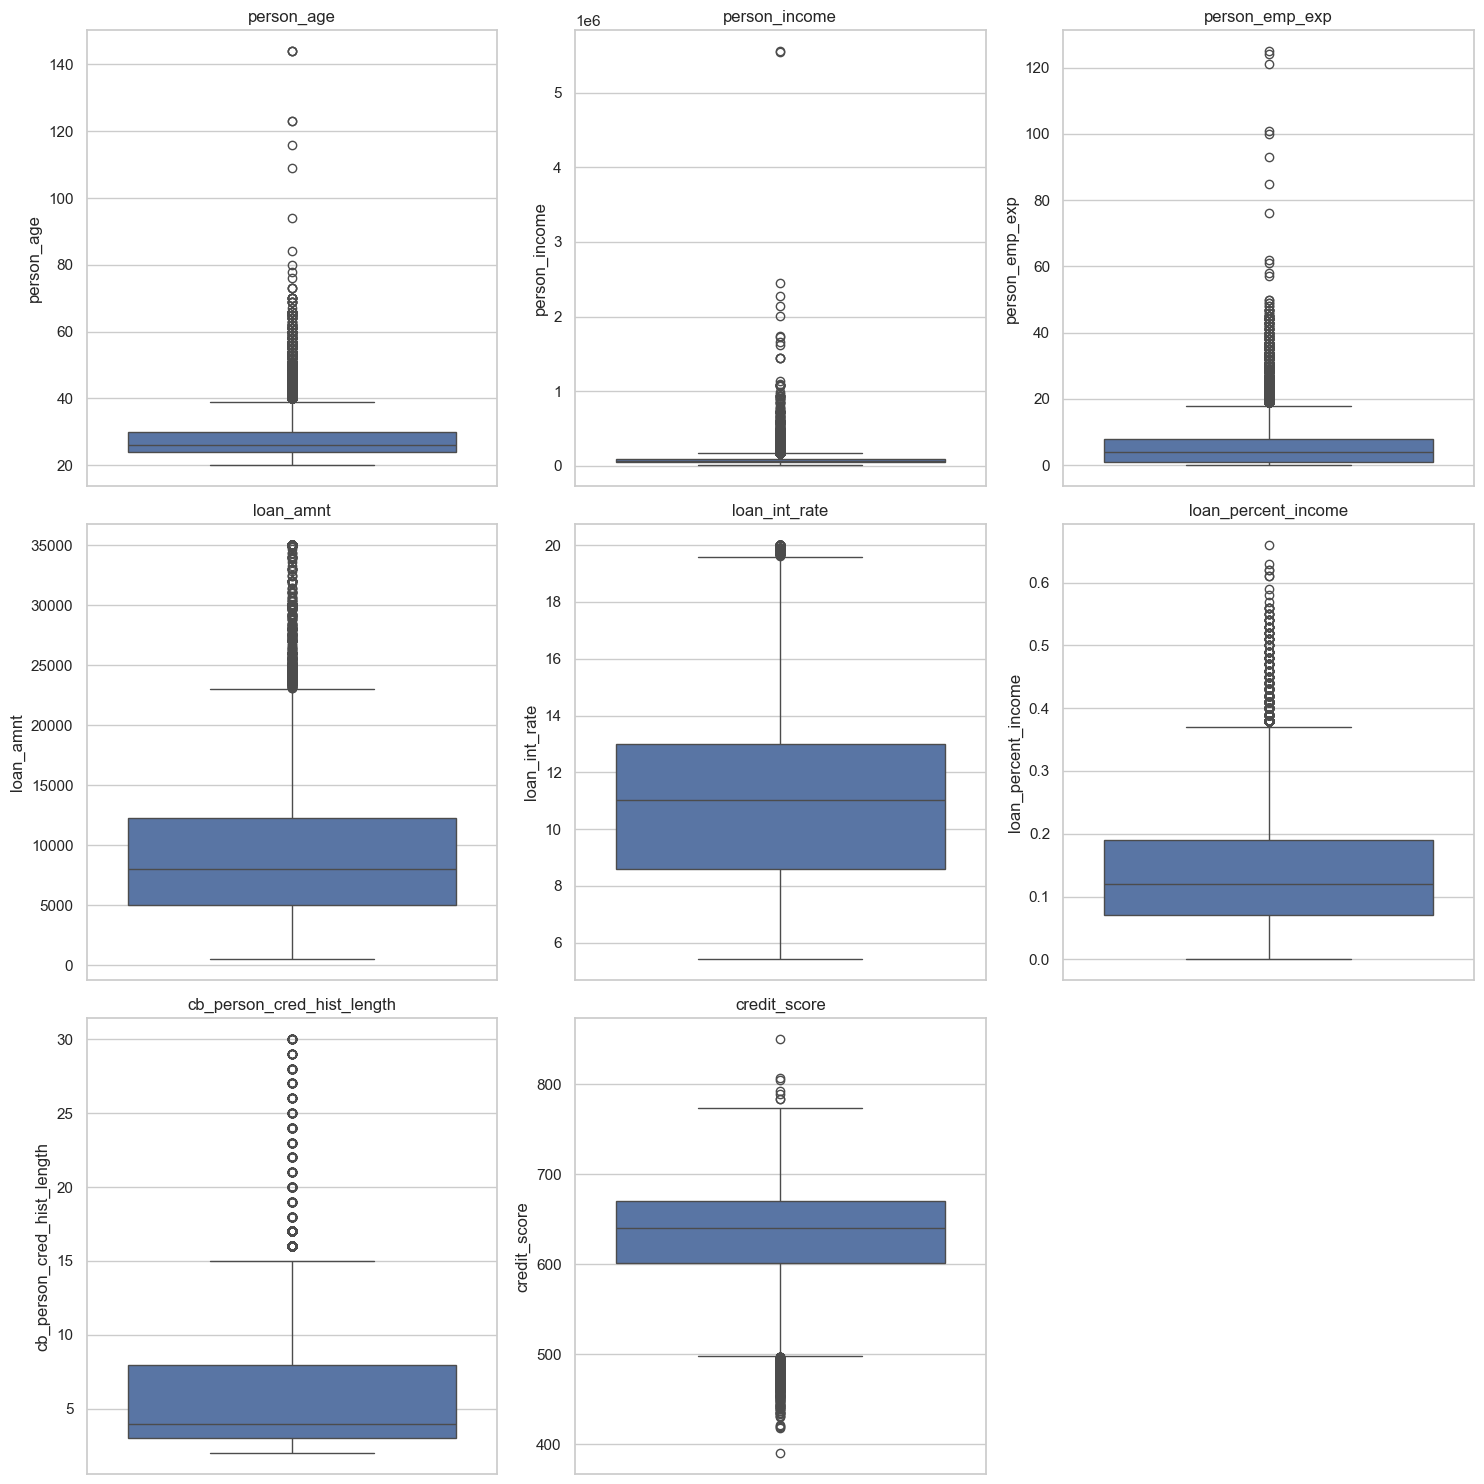

In [15]:
rows = (len(numerical) + 2) // 3  # 3 kolom per baris
plt.figure(figsize=(15, 5 * rows))

for i, col in enumerate(numerical):
    plt.subplot(rows, 3, i+1)
    sns.boxplot(y=x[col])
    plt.title(col)

plt.tight_layout()
plt.show()


Terdapat sangat banyak outliers pada fitur-fitur numerik pada dataset ini. Kita perlu analisis outlier ini, outlier ini bisa disebabkan 2 hal:
- Hasil error pada data entry
- Extreme value yang memang seaslinya begitu

Nilai yang menurut saya tidak masuk akal di sini adalah nilai person_age dan person_emp_exp yang mencapai lebih dari 100 tahun. 
Karena hampir tidak ada yang bekerja di umur lebih dari 100 tahun. Minimal usia seseorang bekerja rata-rata adalah 15 tahun.

Langkah pertama yang saya lakukan adalah menghapus data dengan umur di atas 100 tahun.  
Lalu langkah kedua yang saya lakukan adalah melakukan pengecekan untuk tiap baris. Dimana jika row data tersebut selisih "person_age" dan "person_emp_exp" nya di bawah 15 maka saya akan delete data tersebut.

### Mengatasi nilai outliers dan extreme values

In [16]:
x = x[x['person_age'] < 100]
y = y.loc[x.index]

In [17]:
x["start_working"] = x["person_age"] - x["person_emp_exp"]

x.head(15)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,start_working
0,22,Female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,22
1,21,Female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,21
2,25,Female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,22
3,23,Female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,23
4,24,Male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,23
5,21,Female,High School,NaN,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,21
6,26,Female,Bachelor,93471.0,1,RENT,35000.0,EDUCATION,12.42,0.37,3.0,701,No,25
7,24,Female,High School,95550.0,5,RENT,35000.0,MEDICAL,11.11,0.37,4.0,585,No,19
8,24,Female,Associate,100684.0,3,RENT,35000.0,PERSONAL,8.90,0.35,2.0,544,No,21
9,21,Female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640,No,21


In [18]:
# melakukan filter pengambilan kepada row yang memiliki waktu mulai bekerja di umur 15 tahun atau lebih
x = x[x["start_working"]>= 15]
y = y.loc[x.index]

Saya telah selesai melakukan filtering dengan usia mulai bekerja di atas 15 tahun. Maka saya akan drop kembali fitur ini dan mereset index pada x dan y

In [19]:
x = x.drop('start_working', axis=1)

x = x.reset_index(drop=True)
y = y.reset_index(drop=True)

Sisa dari outliers akan saya biarkan karena bisa saja merupakan extreme values yang mengandung nilai sesungguhnya dari fitur tersebut. Dan juga karena model XGBoost dan Random Forest mampu menghandle data dengan outliers

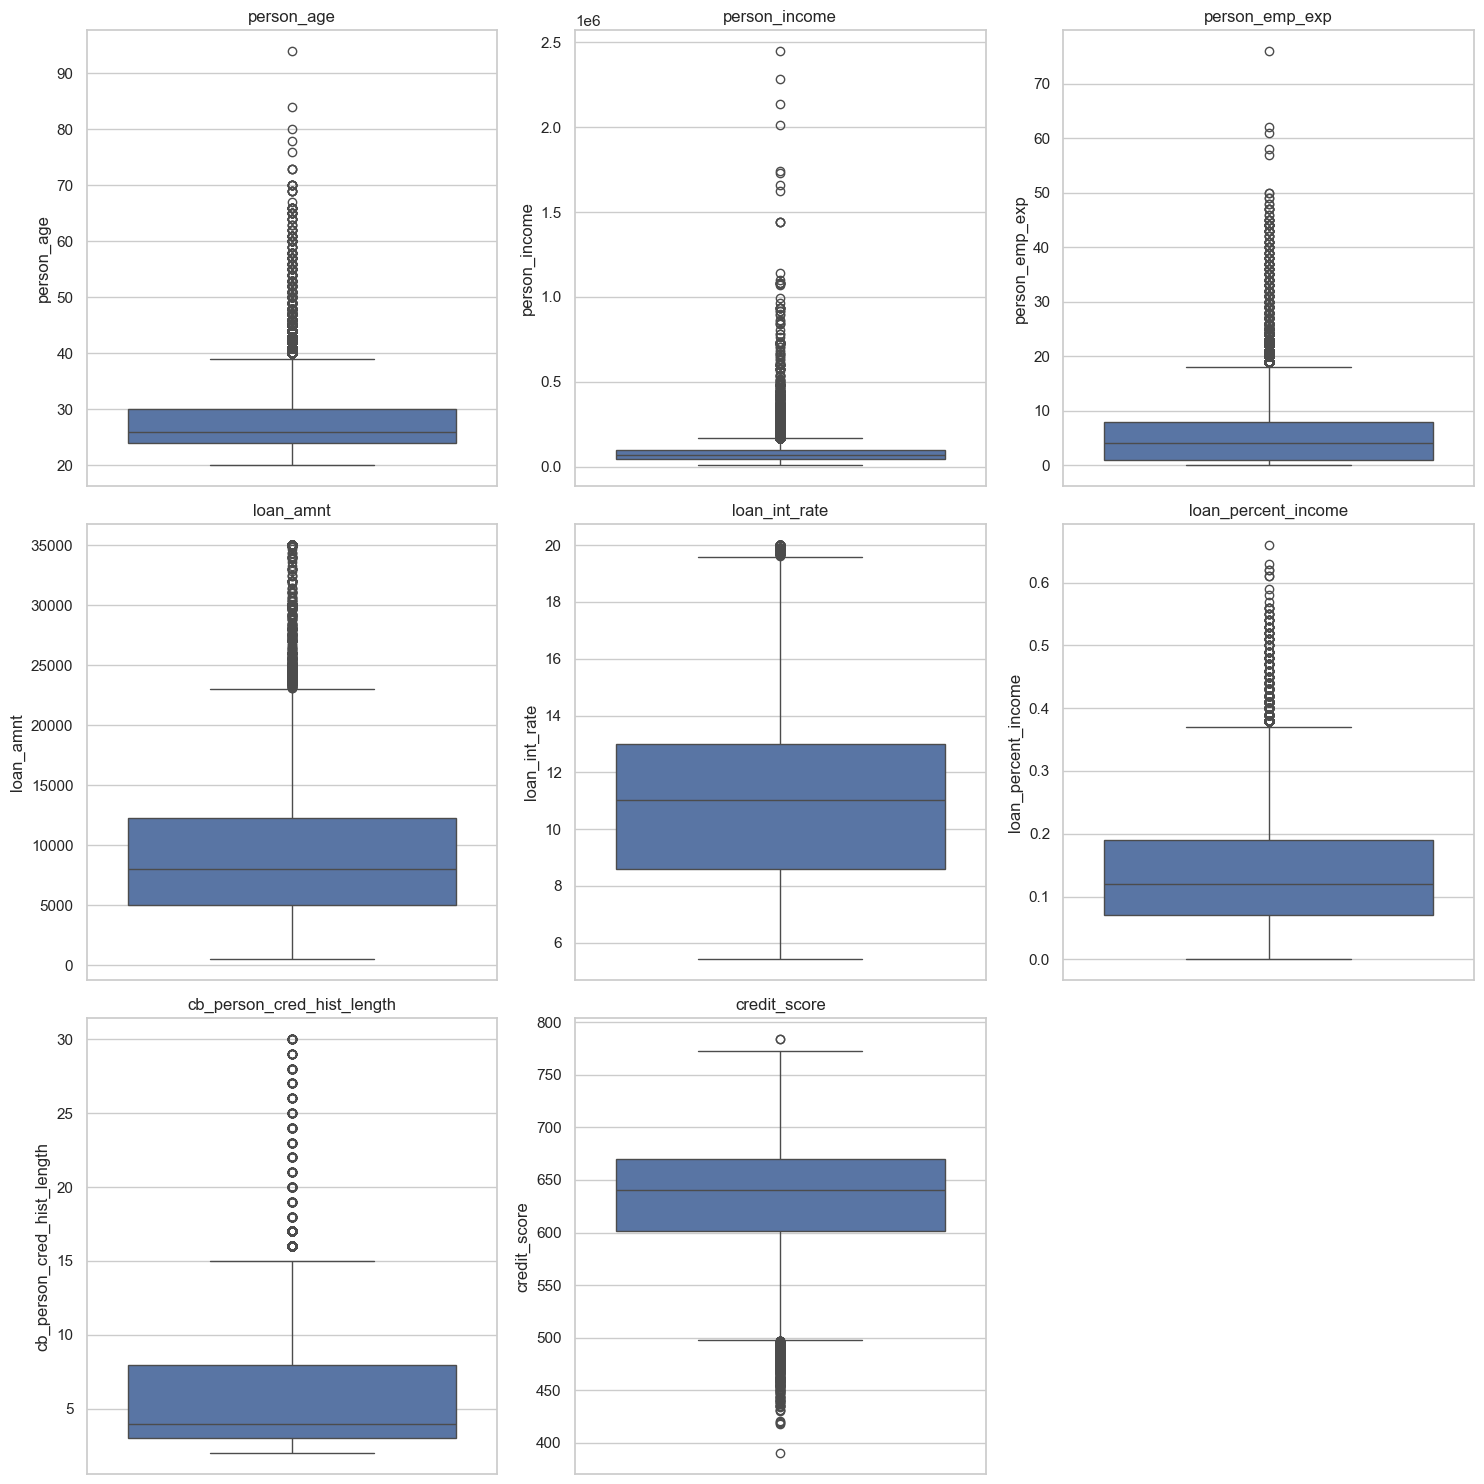

In [20]:
rows = (len(numerical) + 2) // 3  # 3 kolom per baris
plt.figure(figsize=(15, 5 * rows))

for i, col in enumerate(numerical):
    plt.subplot(rows, 3, i+1)
    sns.boxplot(y=x[col])
    plt.title(col)

plt.tight_layout()
plt.show()


### Imputasi missing value

Mengecek fitur apa yang ada missing value

In [21]:
for col in x.columns:
    if x[col].isnull().sum() > 0:
        print(col)
        print(x[col].isnull().sum())

person_income
2249


Dikarenakan banyaknya outliers pada fitur ini maka saya akan menginput missing value dengan nilai **median** dari data.

In [22]:
x['person_income'].fillna(x['person_income'].median(), inplace=True)

### Encoding dan Scaling

Untuk encoding pada fitur kategorikal saya akan menggunakan **Label Encoding**  
Dan scaling pada fitur numerikal saya akan menggunakan **Robust Scaler**

In [23]:
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()
encoders = {}
    
for col in categorical:
    x[col] = label_encode.fit_transform(x[col])
    encoders[col] = label_encode


In [24]:
from sklearn.preprocessing import RobustScaler
scaler_normal = RobustScaler()

x[numerical] = scaler_normal.fit_transform(x[numerical])


#### DATA SIAP DIGUNAKAN UNTUK PEMBUATAN MODEL

In [25]:
x.head(5)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,-0.666667,0,4,0.109806,-0.571429,3,3.730828,4,1.138636,3.083333,-0.2,-1.144928,0
1,-0.833333,0,3,-1.228506,-0.571429,2,-0.967252,1,0.029545,-0.333333,-0.4,-1.971014,1
2,-0.166667,0,3,-1.225007,-0.142857,0,-0.345447,3,0.422727,2.666667,-0.2,-0.072464,0
3,-0.500000,0,1,0.284873,-0.571429,3,3.730828,3,0.959091,2.666667,-0.4,0.507246,0
4,-0.333333,1,4,-0.020580,-0.428571,3,3.730828,3,0.740909,3.416667,0.0,-0.782609,0


### Splitting Dataset

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

In [27]:
print("train data: ", x_train.shape, " & ", y_train.shape)
print("test data: ", x_test.shape, " & ", y_test.shape)

train data:  (35994, 13)  &  (35994,)
test data:  (8999, 13)  &  (8999,)


## Model Fitting

#### Pembentukan model XGBoost dan Random Forest melibatkan Hyperparameter Tuning

In [28]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_params = {
    'n_estimators': [100, 200, 300],     
    'max_depth': [10, 20, 30],          
    'min_samples_split': [2, 5, 10],       
    'min_samples_leaf': [1, 2, 4],         
    'max_features': ['sqrt', 'log2'],
}

xgb_params = {
    'learning_rate': [0.01, 0.1, 0.2],      
    'max_depth': [3, 5, 7],            
    'n_estimators': [100, 200, 300], 
    'colsample_bytree': [0.5, 0.7, 1.0],   
    'subsample': [0.6, 0.8, 1.0],  
}

rf = RandomForestClassifier()
xgb = XGBClassifier()

rf_class = RandomizedSearchCV(estimator=rf, param_distributions=rf_params, cv=5, n_iter=10, random_state=42)
xgb_class = RandomizedSearchCV(estimator=xgb, param_distributions=xgb_params, cv=5, n_iter=10, random_state=42)

rf_class.fit(x_train, y_train)
xgb_class.fit(x_train, y_train)

print("Hyperparameter terbaik untuk tiap model:")
print(f"Random Forest: {rf_class.best_params_}")
print(f"XGBoost: {xgb_class.best_params_}")

Hyperparameter terbaik untuk tiap model:
Random Forest: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
XGBoost: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 1.0}


#### Dari Hyperparameter terbaik dimasukkan ke dalam model untuk melakukan prediksi pada X Test

In [29]:
best_rf = rf_class.best_estimator_
best_xgb = xgb_class.best_estimator_

y_predRF = best_rf.predict(x_test)
y_predXGB = best_xgb.predict(x_test)

#### Evaluasi performa kedua model Classifier

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

metrics = {
    "Model": ["Random Forest", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, y_predRF),
        accuracy_score(y_test, y_predXGB)
    ],
    "Precision": [
        precision_score(y_test, y_predRF, average="weighted"),
        precision_score(y_test, y_predXGB, average="weighted")
    ],
    "Recall":[
        recall_score(y_test, y_predRF, average="weighted"),
        recall_score(y_test, y_predXGB, average="weighted")
    ],
    "F-1 Score":[
        f1_score(y_test, y_predRF, average="weighted"),
        f1_score(y_test, y_predXGB, average="weighted")
    ]
}

results = pd.DataFrame(metrics)

print("Hasil dalam tabel: ")
results

Hasil dalam tabel: 


,Model,Accuracy,Precision,Recall,F-1 Score
0,Random Forest,0.927992,0.926695,0.927992,0.925888
1,XGBoost,0.932104,0.930813,0.932104,0.930785


In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predRF, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7002
           1       0.90      0.76      0.82      1997

    accuracy                           0.93      8999
   macro avg       0.92      0.87      0.89      8999
weighted avg       0.93      0.93      0.93      8999



In [32]:
print(classification_report(y_test, y_predXGB, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      7002
           1       0.89      0.80      0.84      1997

    accuracy                           0.93      8999
   macro avg       0.91      0.88      0.90      8999
weighted avg       0.93      0.93      0.93      8999



Dari hasil performa kedua model, saya memilih XGBoost sebagai model yang mampu berperforma lebih baik dalam dataset ini

#### Menyimpan Model XGBoost ke dalam pickle beserta Encoder dan Scaler

In [33]:
joblib.dump(encoders, "label_encoding.pkl")
joblib.dump(scaler_normal, "scaler.pkl")
joblib.dump(best_xgb, "xgbmodel.pkl")

['xgbmodel.pkl']